# Project McNaulty: Humanitarian Crisis Classifier: An Exploratory Analysis to Predict Countries at Risk of Humanitarian Crisis

**Team Members:**
* Emliy Hough-Kovacs 
* Ken Myers
* Dan Yawitz
* Bryan Bumgardner
* Ken Chadwick

**This iPython Notebook evaluates the Security Index of this stacked classification model.  The data evaluated was drawn from several sources:**

* [Council on Foreign Relations](http://www.cfr.org/), New York
    * [Invisible Armies Insurgency Tracker: A Visual History of Guerrilla Warfare From 1775 to 2012](http://www.cfr.org/wars-and-warfare/invisible-armies-insurgency-tracker/p29917)
* [Institute for Economics and Peace](http://economicsandpeace.org/), New York 
    * [Peace Index 2015](http://economicsandpeace.org/wp-content/uploads/2015/06/Global-Peace-Index-Report-2015_0.pdf)
    * [Terror Index 2015](http://economicsandpeace.org/wp-content/uploads/2015/11/2015-Global-Terrorism-Index-Report.pdf)
    * The Institute of Economics and Peace also provided access to data not posted on their webpage from 2002 through 2014 and 2008 through 2014 for the Terror and Peace Indexs respectively.
* [UN High Comission on Refugees](http://www.unhcr.org/cgi-bin/texis/vtx/home)
    * [UNHCR Population Statistics Database](http://popstats.unhcr.org/en/overview#_ga=1.218023829.2086924727.1454354281)
* Uppsala Universitet, Department of Peace and Conflict Research, Uppsala, Sweden
    * [Uppsala Conflict Data Program](http://www.pcr.uu.se/research/ucdp/)
    * Dataset: [UCDP/PRIO Armed Conflict Dataset v.4-2015, 1946 – 2014](http://www.pcr.uu.se/research/ucdp/datasets/ucdp_prio_armed_conflict_dataset/)

**Additional information on Humanitarian Issues and Interally Displaced Persons (IPDs) and Refugees:**
* [UN High Comission on Refugees](http://www.unhcr.org/cgi-bin/texis/vtx/home)
* [Norwegian Refugee Council](http://www.nrc.no/)
* [Internal Displacement Monitoring Centre](http://www.internal-displacement.org/)
    * [Understanding the Root Causes of Displacement: Towards a Comprehensive Approach to Prevention and Solutions](http://www.internal-displacement.org/publications/2015/understanding-the-root-causes-of-displacement-towards-a-comprehensive-approach-to-prevention-and-solutions), December 2015
    * [Annual Report 2015](http://www.internal-displacement.org/publications/2015/annual-report-2015)

In [13]:
import html5lib
import matplotlib.pyplot as plt
import math
import numpy as np
import operator
import pandas as pd
import pickle
import random
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from collections import defaultdict
from __future__ import division
from patsy import dmatrices
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support, roc_curve, confusion_matrix

from unbalanced_dataset import OverSampler, SMOTE

%matplotlib inline

In [14]:
def pickleme(temp, filename):
    
    with open(filename + '.pkl', 'w') as picklefile:
        pickle.dump(temp, picklefile)
    
    return

In [15]:
def getpickle(filename):

    try:
        with open(filename + '.pkl', 'r') as picklefile:
            return pickle.load(picklefile)
    except:
        return 'There was an error trying to read this file.  Please check the filename or path.'

In [16]:
models = [KNeighborsClassifier(n_neighbors = 6), LogisticRegression(), GaussianNB(), 
          SVC(probability = True), DecisionTreeClassifier(), RandomForestClassifier()]

metrics = ['Accuracy', 'Precision', 'Recall', 'f1 Score']

labels = ['kNN','Logit','Gauss','SVC','DTC', 'RFC']

# years = ['y2002', 'y2003', 'y2004', 'y2005', 'y2006', 'y2007', 'y2008', 'y2009', 'y2010', 'y2011', 
#          'y2012', 'y2013', 'y2014']

years = ['2008', '2009', '2010', '2011', '2012', '2013', '2014']

colors = getpickle('tableaucolors')

In [17]:
# tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
#              (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
#              (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
#              (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
#              (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

# for i in range(len(tableau20)):    
#     r, g, b = tableau20[i]    
#     tableau20[i] = (r / 255., g / 255., b / 255.)
    
# pickleme(tableau20,'tableaucolors')

### Find optimal value for k for the k-Nearest Neighbors Classification model

In [18]:
for i, year in enumerate(years):

    temp = getpickle(year)

    y = temp['y']
    X = temp[['Xterror', 'Xpeace', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']]
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 4444)

    trainaccuracy = []
    testaccuracy = []

    for k in range(1,21):
        neighbors = KNeighborsClassifier(n_neighbors=k)
        neighbors.fit(Xtrain, ytrain) 
    
        trainaccuracy.append(accuracy_score(ytrain, neighbors.predict(Xtrain)))
        testaccuracy.append(accuracy_score(ytest, neighbors.predict(Xtest)))

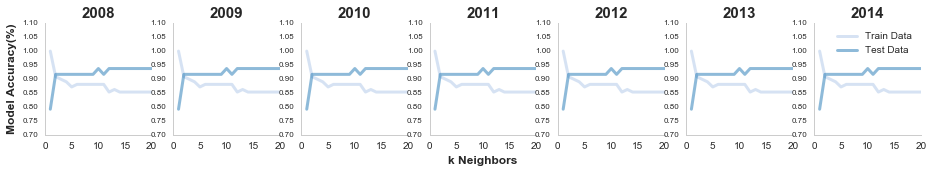

In [19]:
plt.figure(figsize=(18,2))
ax = plt.subplot(111) 

for i, year in enumerate(years):
    
    ax = plt.subplot(181 + i) 
    sns.set_style("whitegrid")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.plot(range(1,21), trainaccuracy, color = colors[1], lw = 3, alpha = 0.5, label = 'Train Data')
    plt.plot(range(1,21), testaccuracy, color = colors[0], lw = 3, alpha = 0.5, label = 'Test Data')
    
    plt.title(year, fontsize=15, fontweight='bold')
    if i == 3:
        plt.xlabel('k Neighbors', fontsize=12, fontweight='bold')
    plt.ylim(0.7,1.1)
    plt.yticks(fontsize=8)
    if i == 0:
        plt.ylabel('Model Accuracy(%)', fontsize=12, fontweight='bold')
    if i == 6:
        plt.legend()
    plt.grid(False)

In [37]:
sklm, sklcv = ([] for i in range(2))

for i,year in enumerate(years):

    temp = getpickle(year)

    y = temp['y']
    X = temp[['Xterror', 'Xpeace', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']]
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 4444)

    am, pm, rm, fm, acv, pcv, rcv, fcv = ([] for i in range(8))
    
    for j, model in enumerate(models):
        temp = model.fit(Xtrain,ytrain)
        
        am.append(accuracy_score(ytest, temp.predict(Xtest)))
        acv.append(cross_val_score(temp, X, y, cv = 5, scoring = 'accuracy').mean())
        pm.append(precision_score(ytest, temp.predict(Xtest)))
        pcv.append(cross_val_score(temp, X, y, cv = 5, scoring = 'precision').mean())
        rm.append(recall_score(ytest, temp.predict(Xtest)))
        rcv.append(cross_val_score(temp, X, y, cv = 5, scoring = 'recall').mean())
        fm.append(f1_score(ytest, temp.predict(Xtest)))
        fcv.append(cross_val_score(temp, X, y, cv = 5, scoring = 'f1').mean())
    
    sklm.append((am, pm, rm, fm))    
    sklcv.append((acv, pcv, rcv, fcv))

In [38]:
# pickleme(sklcv, 'sklcv')

In [22]:
# data = getpickle('securitymetrics')

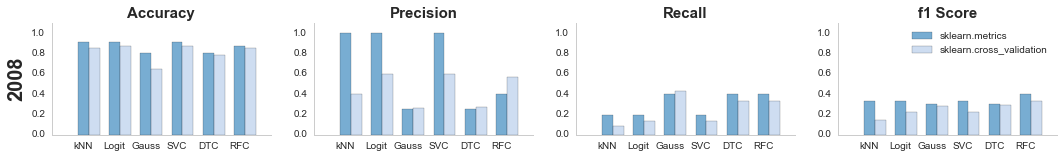

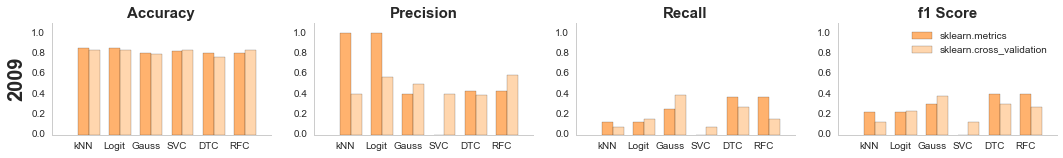

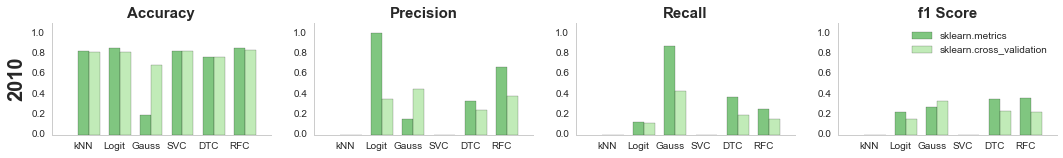

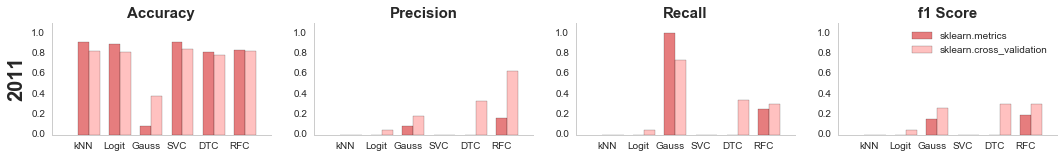

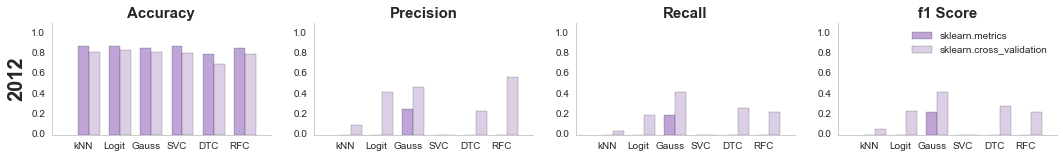

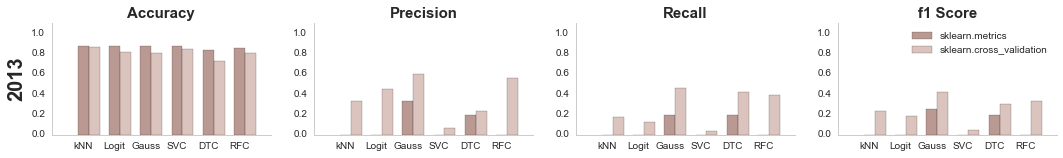

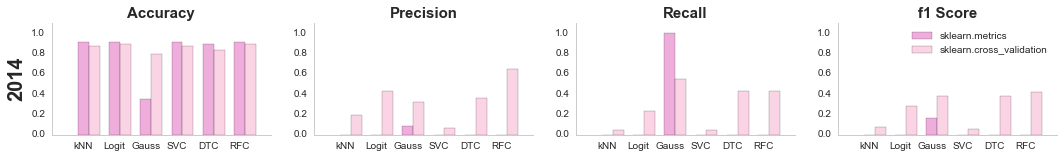

In [39]:
index = np.arange(6)
bw = 0.35

for i,year in enumerate(years):
    
    plt.figure(figsize=(18,2))
    
    for j, model in enumerate(metrics):
        ax = plt.subplot(141 + j)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        sns.set_style("whitegrid")

        plt.bar(index, sklm[i][j], bw, 
                align = 'center', 
                color = colors[(i*2)], 
                alpha = 0.6, 
                label = 'sklearn.metrics')
        plt.bar(index + bw, sklcv[i][j], bw, 
                align = 'center', 
                color = colors[(i*2) + 1], 
                alpha = 0.6, 
                label = 'sklearn.cross_validation')

        plt.title(metrics[j], fontsize=15, fontweight='bold')
        plt.xticks([0,1,2,3,4,5], labels)
        plt.ylim(0.0, 1.1)
        if j == 0:
            plt.ylabel(year,fontsize=20, fontweight='bold')
        if j == 3:
            plt.legend()
        plt.grid(False)

In [48]:
sklm[0][1]

[1.0, 1.0, 0.25, 1.0, 0.25, 0.40000000000000002]

In [52]:
for i,year in enumerate(years):
    
    print '\nSecurity Index Modeling Results for', year, '\n' 
    print '\t\t',labels[0],'\t\t',labels[1],'\t\t',labels[2],'\t\t',labels[3],'\t\t',labels[4],'\t\t',labels[5],'\n'
    
    for j, metric in enumerate(metrics):
        if metric == 'Recall':
            print metric + ':\t\t%0.4f' %sklm[i][j][0],
        else:
            print metric + ':\t%0.4f' %sklm[i][j][0],
        print '\t\t%0.4f' %sklm[i][j][1], '\t\t%0.4f' %sklm[i][j][2],
        print '\t\t%0.4f' %sklm[i][j][3], '\t\t%0.4f' %sklm[i][j][4], '\t\t%0.4f' %sklm[i][j][5]
        


Security Index Modeling Results for 2008 

		kNN 		Logit 		Gauss 		SVC 		DTC 		RFC 

Accuracy:	0.9149 		0.9149 		0.8085 		0.9149 		0.8085 		0.8723
Precision:	1.0000 		1.0000 		0.2500 		1.0000 		0.2500 		0.4000
Recall:		0.2000 		0.2000 		0.4000 		0.2000 		0.4000 		0.4000
f1 Score:	0.3333 		0.3333 		0.3077 		0.3333 		0.3077 		0.4000

Security Index Modeling Results for 2009 

		kNN 		Logit 		Gauss 		SVC 		DTC 		RFC 

Accuracy:	0.8511 		0.8511 		0.8085 		0.8298 		0.8085 		0.8085
Precision:	1.0000 		1.0000 		0.4000 		0.0000 		0.4286 		0.4286
Recall:		0.1250 		0.1250 		0.2500 		0.0000 		0.3750 		0.3750
f1 Score:	0.2222 		0.2222 		0.3077 		0.0000 		0.4000 		0.4000

Security Index Modeling Results for 2010 

		kNN 		Logit 		Gauss 		SVC 		DTC 		RFC 

Accuracy:	0.8298 		0.8511 		0.1915 		0.8298 		0.7660 		0.8511
Precision:	0.0000 		1.0000 		0.1591 		0.0000 		0.3333 		0.6667
Recall:		0.0000 		0.1250 		0.8750 		0.0000 		0.3750 		0.2500
f1 Score:	0.0000 		0.2222 		0.2692 		0.0000 		0.3529 		0.363

In [ ]:
Xtemp = Xtrain
sm.add_constant(Xtemp)

In [ ]:
test = sm.OLS(ytrain,Xtemp).fit()

test.summary()